# Accounting Research
# Factorm Clustering Analysis of Financial Ratios

### Notebook Configurations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.cluster import KMeans
from sklearn import preprocessing, linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### Data Preparation 

In [4]:
data = pd.read_csv("/Users/jlroo/Desktop/accounting/data/csv/US_GAAP_2011.csv")
factors = pd.read_csv("/Users/jlroo/Desktop/accounting/data/csv/US_factors.csv")
data.columns = list(range(1,51))
corr = data.corr()
dec_corr = corr.sort_index(ascending=False)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,42.129630,12.786144,285.578828,7.104444,1.694915,31.096376,0.690371,180.876494,3.065703,6.317104,...,56.277533,83.527454,4.418236,0.613356,2.567817,163.037461,32.963063,47.659531,19.164191,2.511409
1,24.587598,1.178338,568.911048,77.117896,8.667923,5.794678,0.569748,154.674448,13.407062,16.147590,...,124.490521,242.278902,5.072821,1.869247,1.076372,53.497464,23.229518,73.672075,69.513237,11.780029
2,23.392283,0.000000,2769.314642,307.476635,11.163264,14.465474,0.309314,27.811550,3.104677,-15.336764,...,-117.850638,-94.089609,10.003040,15.281675,1.050158,6.543785,22.089012,44.521249,-69.431644,-3.168224
3,18.273444,4.924854,508.487363,17.917767,2.600673,10.711415,0.649931,84.000000,2.184566,9.080457,...,131.706183,-2638.888889,6.922685,2.171528,1.163006,46.050520,33.603438,58.883910,27.022403,8.526992
4,39.768908,0.000000,2999.940770,2.645607,0.080056,61.602539,0.630420,91.044776,0.072887,6.115353,...,3924.590164,-1340.000000,9.222299,0.356556,2.999199,280.461243,17.428397,10.708899,35.088441,7.582222


### Data Exploration - Visualization - Correlations

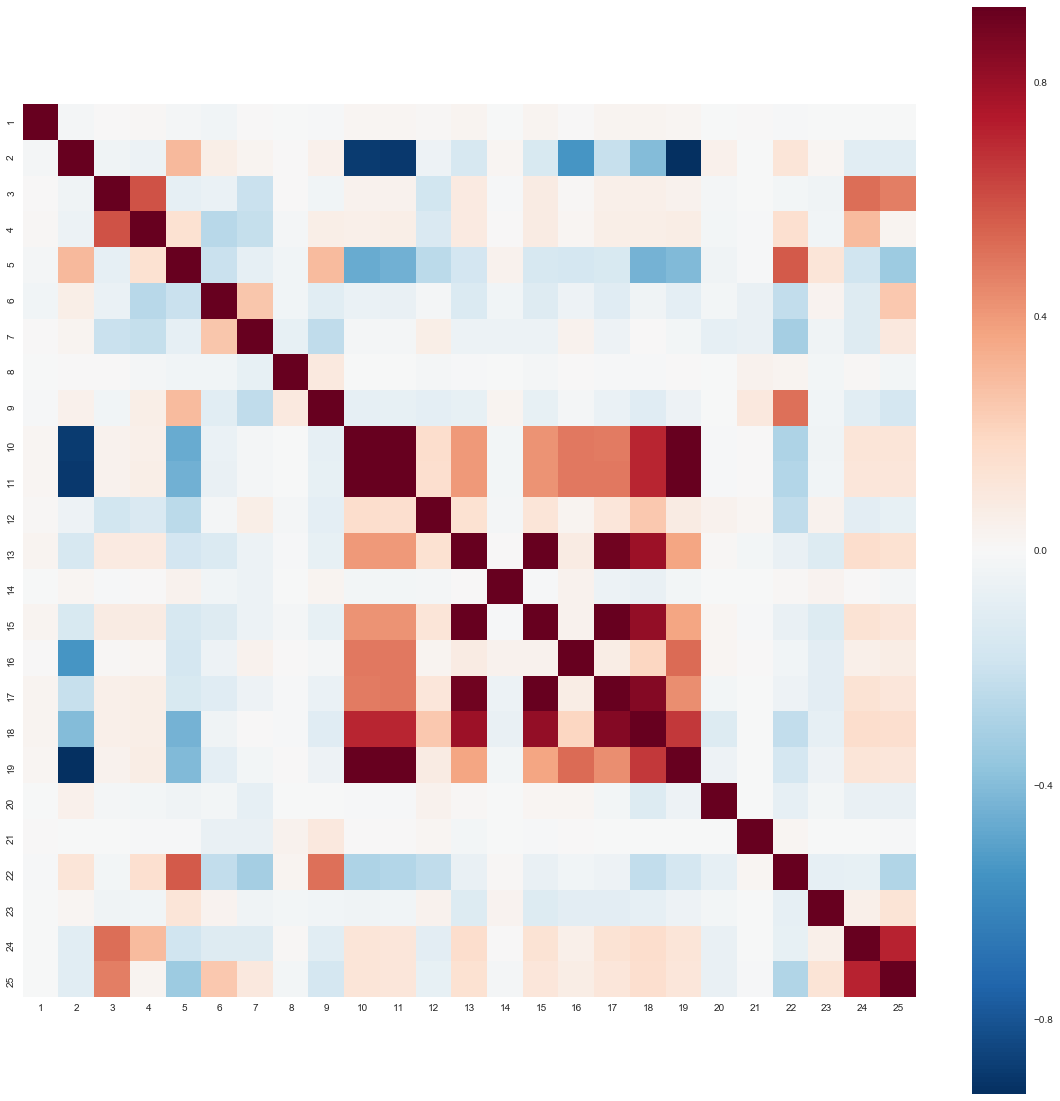

In [5]:
plt.subplots(figsize=(20, 20))
sns.heatmap(corr[:25][corr.columns[:25]], vmax=.9, square=True)
plt.show()

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(corr[25:][corr.columns[25:]], vmax=.9, square=True)
plt.show()

In [ ]:
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(dec_corr[:26][dec_corr.columns[:25]], vmax=.9, square=True)
ax.invert_yaxis()
plt.show()

In [ ]:
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(dec_corr[24:][dec_corr.columns[25:]], vmax=.9, square=True)
ax.invert_yaxis()
plt.show()

### Complete Correlation Matrix 

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.9, square=True)
plt.show()

# Features Reduction - Kmeans Clustering 

### Transformations - Normalize, PCA Reduction

In [3]:
df = preprocessing.normalize(data.as_matrix(), norm='l1')
reduced_2d = PCA(n_components=2).fit_transform(df)

### Unsupervised Dimensionality Reduction

In [4]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

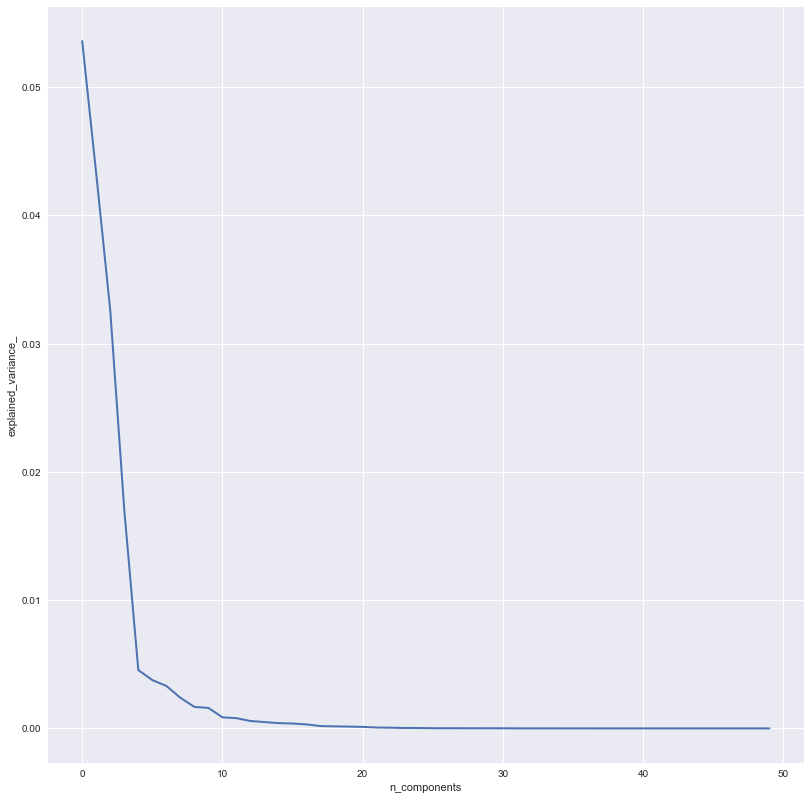

In [5]:
pca.fit(df)
plt.figure(figsize=(15, 15))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [6]:
def compute_scores(X,n_components):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = {}, {}
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores[n] = np.mean(cross_val_score(pca, X))
        fa_scores[n] = np.mean(cross_val_score(fa, X))

    return {"pca_scores": pca_scores, "fa_scores": fa_scores}

In [8]:
n_components = np.arange(10, 15)  # options for n_components
scores = compute_scores(df,n_components)
scores = pd.DataFrame(scores)
scores

,fa_scores,pca_scores
10,182.612789,126.891099
11,183.098101,125.443178
12,186.432887,124.676660
13,180.815650,123.652364
14,183.647193,123.423738


### Complete Correlation Matrix - Normalize Data

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(pd.DataFrame(df).corr(), vmax=.9, square=True)
plt.show()

In [ ]:
# scree plot

### K-Means Model: 10  - PCA Components: 2 

In [ ]:
kmeans_2d = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans_2d.fit(reduced_2d)

In [ ]:
reduced_2d.shape

In [ ]:
kmeans_2d.labels_.shape

### Visualize PCA Reduced Data

In [ ]:
plt.subplots(figsize=(20, 20))
plt.plot(reduced_2d[:, 0], reduced_2d[:, 1], 'k.', markersize=6)
plt.show()

### K-means Clustering -  Visualization

In [ ]:
# Size of the mesh.
h = .001

# Plot the decision boundary.
x_min, x_max = - 1, 1
y_min, y_max = - 1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.subplots(figsize=(20, 20))
plt.clf()

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_2d[:, 0], reduced_2d[:, 1], 'k.', markersize=7)

# Plot the centroids as a white X
centroids = kmeans_2d.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=5,
            color='w', zorder=10)

plt.title('K-means clustering on PCA-reduced data and Centroids')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
Counter(kmeans_2d.labels_)

# K-means Clustering - PCA - Cluster 10

### Transformations - Normalize, PCA Reduction

In [ ]:
df.shape

In [ ]:
reduced_data = PCA(n_components=11).fit_transform(df)
reduced_data.shape

In [ ]:
reduced_data = PCA(n_components=11).fit_transform(df.T)
reduced_data.shape
#reduced_data = PCA(n_components=11).fit_transform(df.T)

In [10]:
data_fa = FactorAnalysis(n_components=12).fit_transform(df.T)
data_fa = pd.DataFrame(data_fa)
data_fa.index = factors['label']
data_fa.head()

,0,1,2,3,4,5,6,7,8,9,10,11
label,,,,,,,,,,,,
a_1,-0.143795,-0.099797,-0.135252,0.366406,-0.242712,-0.277372,6.970977,0.261439,0.053624,-0.004625,-0.000391,-0.023752
a_2,-0.143378,-0.281464,-0.142794,-0.386311,-0.327465,-0.323751,-0.159217,0.150312,-0.436785,0.123106,0.287120,-0.356258
a_3,-0.146273,6.809076,-1.117159,-1.037797,-0.229769,-0.411944,-0.039873,-0.009395,-0.070357,0.059029,-0.066813,-0.174677
a_4,-0.143725,-0.020199,-0.174889,-0.305684,-0.334707,-0.255149,-0.173129,0.168728,0.562148,-0.715145,1.534362,4.790746
a_5,-0.143406,-0.269479,-0.142701,-0.369602,-0.324011,-0.307698,-0.155482,0.132649,-0.322360,0.043791,0.431541,0.031675


In [ ]:
reduced_data = PCA(n_components=11).fit_transform(df.T)
reduced_data = pd.DataFrame(reduced_data)
reduced_data.index = factors['label']
reduced_data.head()

### K-Means Model - Clusters 10

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=10,n_init=10)
clusters = kmeans.fit_predict(reduced_data)
Counter(clusters)

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=12,n_init=10)
clusters = kmeans.fit_predict(data_fa)
Counter(clusters)

Counter({0: 31,
         1: 1,
         2: 1,
         3: 1,
         4: 1,
         5: 1,
         6: 9,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 1})

### Labeling Factors

In [12]:
factors["cluster"] = clusters.tolist()
factors[factors['cluster']==6]

,factor,label,cluster
3,Depreciation and amortization to total operati...,a_4,6
11,Gross profit margin,a_12,6
21,PPE to sales,a_22,6
26,Days sales outstanding (DSO),a_27,6
27,Days payables outstanding,a_28,6
30,Equity ratio,a_31,6
31,Total liabilities to total capital (leverage),a_32,6
33,Leverage structure,a_34,6
46,Current liabilities to sales,a_47,6
